<a href="https://colab.research.google.com/github/NTT123/ai-notebooks/blob/master/Pybind11_SnakeRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Snake RL


### Env

In [0]:
## Tiles
! echo "iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAE6ElEQVR4XuWbL2wUQRTG53STIsFBSFAIgiD4HniCIAFfahAkCET1CQQJAlPqIUHhYc8jESgSAooiITldMtu+493b93d27nK3t6ah3M7O/Oab9973tjdqmuY0bfE1ygD29vaKEUyn01Tr/vF4nK4efzXn8n3/emqapv1c3+e7Aby4cC89//OhM7m+E8D3byyAyWRi7pr0gcPDw7mCMoB8WSpYuQLy7udLUsC7K49cAPLE4YJFPvzxdj0BzO5fnk/2dXOTXTycQS8AjtJaAqCLzxN/cutX2vn0mY0BNQFY8s8TWOoRmN25ndLuSdq58bJd7OzLs7NF/73U/qAQchAbNIA5hG0D0NH6mgCAQLrUOqA9BvnaPZlLn5P/MoKgFQNWAqCVPUA4lwIXAAcNwJXYz0tRHAS5XK+NRdOgpYClZwHvwuFzOQvUrAQ3EsBWmCFJGYMwQ1HZD+nzbju8CQoosdNrA8A7eS0LlIzhBgBenSoh+3maBaBK8xwVyCKe6A/jSWYoAgBAugBoA+c8LtUB+SEWjKiZ0irBKIA8PxUA3nVphygAvOt0spwiSgBgqLSllp8RUZMJwBpMAwAy05RQE0B+TlQFIgBvf84CgCFwICIAOEXROsQ7b1AjCyAyiAcAF7xwKe1pqEjHiSvEIvPvAIjcnBexSgBcQJUqUe86FgB4b8LBLAqAHgPrCGB3GQEA8cAKih0AVtCjkTwCgBYx+d8aAG8WscyYtrFrD8BTR1gANDX0ApB3CFeCHvVwhYzWT6gFAEPAKi4GAOUoBKFI/KjZ1+9rx4sA9K3F1w6Ax7QM9TMuM6QtXpNgPhY1z7DkJSAIeo8hVuDSAGAjpUHoe4ZLzFAVALBA/H4f7xCYEiuX466ypRZLAV4z1AsAbYxwAKgU8QPpIri2egREiRkqAiD1BvCLDVgctaQWADBDuOzVLDSGKJkhrSZxA/A2RGglVgqAqsPyAVBKW8/nxgWVsWYI32BVd14FSDtqmSHaT4C5WW+HpcYIVeMcgDeFcGYI74A0jnQMPAAkZWQImh2mm8cF5BYA1OLWbnNRmCrASx7GKgGAVaFlIWqFuU3oKMDyz5oCrH4cN4EoABoXrEIMb6oKAEdwukhNGZHX2yUAaGagsaQ6ALp4KzZEAXALkHqCVhElZQEuHUtjuUth7c0QrsWtOEJVoP19gacgshQAR1oKwm4AkiGitbgHAFZBTS/AzdHyJIMHAP5AUlMLQNrdbfh9VQV0gB2NUjo4TQl+MkRrHgErYOP6gS2FS3bcXICyeCuKe+YT7QfQbGC+HLUmodnhNtg9mKbx+//fSKFnUcsC+NnSGY4GYVCBqoCIlCQAkA2OP/5O+3cvtmuRCiFPKS7l8aoAJPv76vHZdweevvnZEQTnBXA5TQF4CyHumZw9rg6Ay+NRAN5mBMQArhLUnmm15bl78e+6DZFv4zZaW2aGiweRUhjupwvwvB7Hz57ffzRK02vNwlduMvw4gPy1uRyt0QXn1gqCqwSQj9PCdXC60A/wbuDSFRDZgagdXgimggKsTRN7ghJBbwyA+2sAKIkBUPZGYpDYE8SDRAFEdkBSQEkWAACRLFT8N0KQkugXHy03SOsBXAhZO0dTqFRJYiVbdUjVSrAkCNWsBEF5CxbYqESrmqFIBWm1ta1jBP/f14sMG4DDjf4DW/9pSAwF6vgAAAAASUVORK5CYII=" | base64 -d > tiles.png

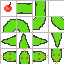

In [2]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import PIL
im = imageio.imread('tiles.png')
[R, G, B] = [im[:,:, i] for i in range(3)] 
PIL.Image.fromarray(np.uint8(im))

In [0]:
! apt install -q libeigen3-dev
! pip install -q pybind11 cppimport git+https://github.com/aldanor/ipybind.git  
% load_ext autoreload
% autoreload 2
% load_ext ipybind
from google.colab import output
output.clear()

In [0]:
%%pybind11 -I /usr/include/eigen3

#include <bits/stdc++.h>
#include <pybind11/pybind11.h>
#include <pybind11/iostream.h>
#include <pybind11/stl.h>
#include <pybind11/numpy.h>
#include <pybind11/eigen.h>
 
namespace py = pybind11;
using namespace std;

using mat = Eigen::MatrixXd;

py::scoped_ostream_redirect __output;
        
struct Obs {
    int reward;
    bool terminated;
    Eigen::MatrixXd env;
};

const int TILE_SIZE=16;

struct Image {   
    Eigen::MatrixXi R, G, B; 
    int h, w;
    
    Image(Eigen::MatrixXi R, Eigen::MatrixXi G, Eigen::MatrixXi B): R(R), G(G), B(B) {
        h = R.rows() / TILE_SIZE;
        w = R.cols() / TILE_SIZE;
    }
    
    Image(int h, int w): h(h), w(w) {
        R = Eigen::MatrixXi::Zero(TILE_SIZE*h+1, TILE_SIZE*w+1);
        G = Eigen::MatrixXi::Zero(TILE_SIZE*h+1, TILE_SIZE*w+1);
        B = Eigen::MatrixXi::Zero(TILE_SIZE*h+1, TILE_SIZE*w+1);
    }
    
    void draw(int x, int y, int tileID, const Image & tiles) {
        if (!(x >= 0 and y >= 0 and x < h and y < w)) return;
        int tx = tileID / tiles.w;
        int ty = tileID % tiles.w;
        if (!(tx >=0 and ty>=0 and tx < tiles.h and ty < tiles.w)) return ;
        
        for(int i=0; i < TILE_SIZE; i++) {
            for(int j=0; j < TILE_SIZE; j++) {
                R(i + x*TILE_SIZE, j + y*TILE_SIZE) = tiles.R(i + tx*TILE_SIZE, j + ty*TILE_SIZE);
                G(i + x*TILE_SIZE, j + y*TILE_SIZE) = tiles.G(i + tx*TILE_SIZE, j + ty*TILE_SIZE);
                B(i + x*TILE_SIZE, j + y*TILE_SIZE) = tiles.B(i + tx*TILE_SIZE, j + ty*TILE_SIZE);
            }
        }
        
    }
};

using XY = pair<int,int>;

XY turn(int act, XY hd) {
    XY ans = hd;
    if (act==0) return ans;
    int sign = (act==1)?(1):(-1);
    if (hd==make_pair(0,  1)) ans={-sign, 0};
    if (hd==make_pair(0, -1)) ans={sign , 0};
    if (hd==make_pair(1,  0)) ans={0,  sign};
    if (hd==make_pair(-1, 0)) ans={0, -sign};
    return ans;
}

struct Env {
    int h, w;
    XY head_direction;
    mat state;
    bool terminated;
    int length;
    Image tiles;
    Image screen;
    
    void generate_food() {
        int x, y;
        while(true) {
            x = rand() % h;
            y = rand() % w;
            if (state(x, y) == 0) break;
        }
        
        state(x,y) = -1;
    }
       
    Env(int h, int w, Image tiles): h(h), w(w), tiles(tiles), screen(h,w) {
        if(h < 5 or w <5) throw invalid_argument("Too small size!");        
        state = Eigen::MatrixXd::Zero(h, w);
        int rm = h/2, cm=w/2;
        state(rm,cm) = 2.0;
        state(rm,cm+1) = 1.0;
        state(rm,cm-1) = 3.0;
        head_direction = {0, 1};
        length=3;
        terminated = 0;
        generate_food();
        
        screen.R.fill(tiles.R(0,0));
        screen.G.fill(tiles.G(0,0));
        screen.B.fill(tiles.B(0,0));
    }
    
    void seed(int s) { srand(s); }
    void reset() { *this = Env(h, w, tiles); }
    

    Eigen::MatrixXi render_dicrete() {
        
        Eigen::MatrixXi discrete = Eigen::MatrixXi::Zero(h, w);
        vector<XY> m(length+1, {-1,-1});
        
        for(int i=0; i<h; i++) {
            for(int j=0; j<w; j++) {
                if (state(i, j) == 0) discrete(i, j) = 3;
                if (state(i, j) ==-1) discrete(i, j) = 0;
                if (state(i, j) > 0) m[ state(i, j) ] = {i, j};
            }
        }
        
        // head
        int dhx = m[1].first-m[2].first;
        int dhy = m[1].second-m[2].second;
        int hidx = (dhx==-1)?(1):(3);
        if (dhy!=0) hidx = (dhy==-1)?(0):(2);
        discrete( m[1].first, m[1].second ) =  hidx+ 12;
        
        // tail
        dhx = m[length].first-m[length-1].first;
        dhy = m[length].second-m[length-1].second;
        hidx = (dhx==-1)?(1):(3);
        if (dhy!=0) hidx = (dhy==-1)?(0):(2);
        discrete( m[length].first, m[length].second) = hidx+ 8;
        
        for(int i=2; i<length;i++) {
            if (m[i-1].first == m[i+1].first) 
                discrete( m[i].first, m[i].second) = 1;
            else if (m[i-1].second == m[i+1].second) 
                discrete( m[i].first, m[i].second) = 2;
            else {
                int dx = m[i-1].first - m[i].first + m[i+1].first - m[i].first;
                int dy = m[i-1].second - m[i].second + m[i+1].second - m[i].second;
                if (dx==1 and dy==1)   discrete( m[i].first, m[i].second) = 4;
                if (dx==-1 and dy==-1) discrete( m[i].first, m[i].second) = 6;
                if (dx==-1 and dy==1)  discrete( m[i].first, m[i].second) = 7;
                if (dx==1 and dy==-1)  discrete( m[i].first, m[i].second) = 5;
            }
        }
        return discrete;
    }
    
    Image render_rgb() {
        Eigen::MatrixXi raw = render_dicrete();
        for(int i=0; i<h; i++) {
            for(int j=0; j<w; j++) {
                screen.draw(i, j, raw(i, j), tiles);
            }
        }
        return screen;
    }
        
    
    Obs step(py::array_t<double> act) {
        
        if (terminated) throw runtime_error("the episode is terminated! call reset()");
        auto r = act.unchecked<1>(); 
        
        if (r.shape(0) != 1) throw invalid_argument("wrong size!");
        
        int iact = int(r[0]); // 0: nothing, 1: turn left, 2: turn right
        
        head_direction = turn(iact, head_direction);

        XY head{-1,-1};
        
        XY tail{-1,-1};
        for(int i=0; i<h; i++) {
            for(int j=0; j<w; j++) {
                if (state(i, j) == length) { state(i, j) = 0; tail={i,j};}
                if (state(i, j) == 1)
                    head = {i + head_direction.first, j + head_direction.second};
                if (state(i, j) > 0) state(i, j)++;
            }
        }
        
        Obs obs;
        obs.reward = 0;
        
        if (head.first < 0 or head.second < 0 or 
            head.first >=h or head.second >= w or 
            state(head.first, head.second) > 0 ) terminated = 1;
        


        if (terminated==0 and state(head.first, head.second)==-1) {
            length++;
            state(tail.first, tail.second) = length;
            state(head.first, head.second) = 1;
            generate_food();
            obs.reward=1;
        }
        
        if (head.first >= 0 and head.first < h and 
            head.second >= 0 and head.second < w) state(head.first, head.second) = 1;
        
        obs.env = render_dicrete().cast<double>();        
        obs.terminated = terminated;
        
        return obs;
    }
        
    string toString() {
        ostringstream out;
        for(int i=0;i<h;i++) {
            for(int j=0; j<w;j++) 
                out << "  " << state(i, j);
            out << "\n";
        }
        return out.str();
    }
    
};

PYBIND11_PLUGIN(world) {
    py::module m("world");
    py::class_<Obs>(m, "Obs", py::module_local())
        .def_readonly("reward", &Obs::reward)
        .def_readonly("terminated", &Obs::terminated)
        .def_readonly("env", &Obs::env);
    
    py::class_<Image>(m, "Image", py::module_local())
        .def(py::init<Eigen::MatrixXi, Eigen::MatrixXi, Eigen::MatrixXi>())
            .def_readonly("R", &Image::R)
            .def_readonly("G", &Image::G)
            .def_readonly("B", &Image::B);

    py::class_<Env>(m, "Env", py::module_local())
        .def(py::init<int, int, Image>())
        .def("step", &Env::step)
        .def("reset", &Env::reset)
        .def("seed", &Env::seed)
        .def("render_rgb", &Env::render_rgb)
        .def_readonly("head_direction", &Env::head_direction)
        .def_readonly("state", &Env::state)
        .def("__repr__", &Env::toString);    
    return m.ptr();
}

### Test

In [0]:
env = Env(10, 10, Image(R, G, B))

In [0]:
env.reset()

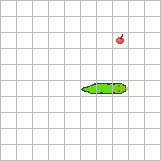

In [7]:
obs=env.step([0])
sc = env.render_rgb()
PIL.Image.fromarray(np.uint8(np.stack((sc.R, sc.G, sc.B), axis=-1)))

In [8]:
obs.env

array([[ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  8.,  1., 14.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]])

In [9]:
0

0